In [ ]:
# Connection to google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Check the shape of the training and test datasets
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Check the range of pixel values
print(f"Pixel value range: {x_train.min()} to {x_train.max()}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Pixel value range: 0 to 255


In [ ]:
# Reshape the data to include the channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Verify the new shape
print(f"Reshaped training data shape: {x_train.shape}")
print(f"Reshaped test data shape: {x_test.shape}")

Reshaped training data shape: (60000, 28, 28, 1)
Reshaped test data shape: (10000, 28, 28, 1)


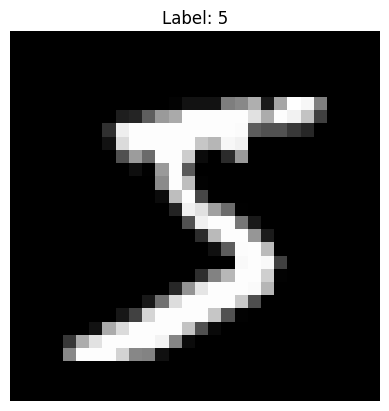

In [ ]:
import matplotlib.pyplot as plt
# Get the image and label
image = x_train[0]
label = y_train[0]

plt.imshow(image, cmap='gray')  # 'gray' colormap for grayscale images
plt.title(f"Label: {label}")
plt.axis('off')  # Hide the axes
plt.show()

In [ ]:

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Check the pixel value range after normalization
print(f"Normalized pixel value range: {x_train.min()} to {x_train.max()}")

Normalized pixel value range: 0.0 to 1.0


In [ ]:
# Check the unique values in the labels
print(f"Unique labels in training set: {np.unique(y_train)}")
print(f"Unique labels in test set: {np.unique(y_test)}")

Unique labels in training set: [0 1 2 3 4 5 6 7 8 9]
Unique labels in test set: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:

# Define the LeNet-5 model
model = Sequential([
    Conv2D(6, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (5, 5), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
#  the learning rate will be reduced by a factor of 0.1 if the validation loss does not improve after 3 epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, mode='auto', min_delta=0.001, cooldown=0, min_lr=0.00001)

from keras.callbacks import EarlyStopping
# Define a callback that stops training when the accuracy stops improving
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, min_delta=0.001, mode='max')

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

# Train the model
train = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_split=0.2, callbacks=[reduce_lr, early_stopping])

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 110ms/step - accuracy: 0.7786 - loss: 0.7612 - val_accuracy: 0.9610 - val_loss: 0.1316 - learning_rate: 0.0010
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 83ms/step - accuracy: 0.9687 - loss: 0.1024 - val_accuracy: 0.9747 - val_loss: 0.0804 - learning_rate: 0.0010
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 84ms/step - accuracy: 0.9797 - loss: 0.0660 - val_accuracy: 0.9792 - val_loss: 0.0670 - learning_rate: 0.0010
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.9841 - loss: 0.0494 - val_accuracy: 0.9820 - val_loss: 0.0598 - learning_rate: 0.0010
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 85ms/step - accuracy: 0.9861 - loss: 0.0417 - val_accuracy: 0.9803 - val_loss: 0.0632 - learning_rate: 0.0010
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.9887 - loss: 0.0358 - val_accuracy: 0.9851 - val_loss: 0.0540 - learning_rate: 0.0010
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.

In [ ]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"LeNet-5 Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9838 - loss: 0.0516
LeNet-5 Test accuracy: 0.9874


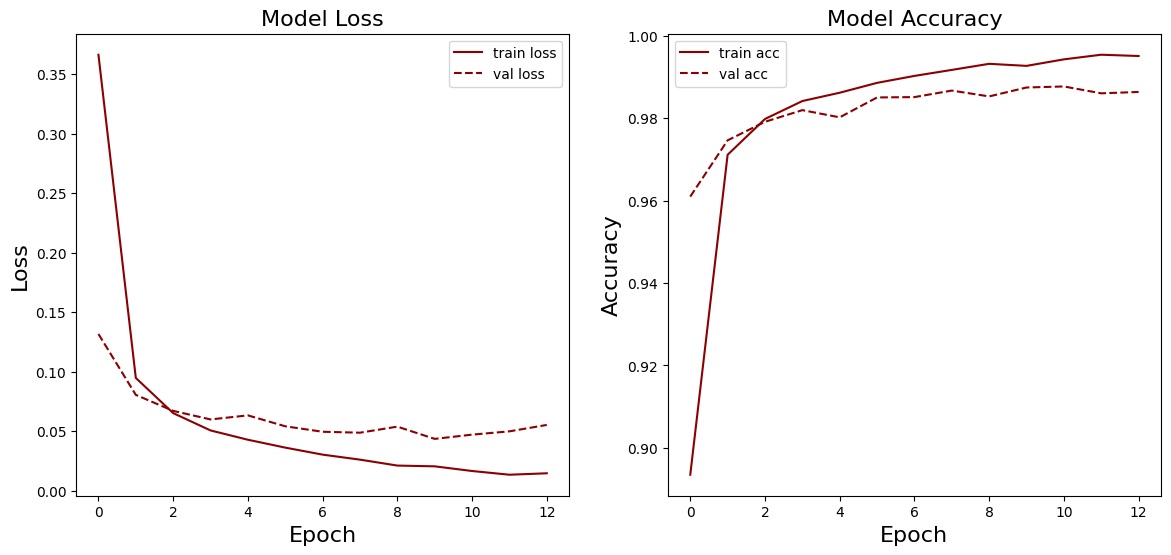

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
plt.plot(train.history['loss'], label='train loss', color = 'darkred')
plt.plot(train.history['val_loss'], label='val loss',linestyle='--', color = 'darkred')
plt.title('Model Loss', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.legend()
#plt.show()


plt.subplot(1,2,2)
# plot the accuracy
plt.plot(train.history['accuracy'], label='train acc', color = 'darkred')
plt.plot(train.history['val_accuracy'], label='val acc', linestyle='--', color = 'darkred')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.legend()
plt.show()

In [ ]:
# import joblib
# Save the model using joblib
# joblib.dump(model, '/content/drive/MyDrive/dlytica/model/LeNet.pkl')
model.save('/content/drive/MyDrive/dlytica/model/LeNet.h5')


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns

# Predict on the test set
y_test_pred_probs = model.predict(x_test)  # Predict probabilities
y_test_pred = np.argmax(y_test_pred_probs, axis=1)  # Convert probabilities to class predictions

# Convert y_test to class labels (from one-hot encoding)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step

Confusion Matrix:
[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1113    1    7    1    0    3    5    5    0]
 [   0    0 1021    3    0    0    0    7    1    0]
 [   0    0    0 1008    0    0    0    1    1    0]
 [   0    0    0    0  970    0    0    3    0    9]
 [   1    0    0   13    0  875    1    1    1    0]
 [   4    1    0    0    1    6  945    0    1    0]
 [   1    0    2    1    0    0    0 1023    1    0]
 [   1    0    2    4    0    1    0    2  960    4]
 [   1    2    0    9    3    2    0    7    4  981]]


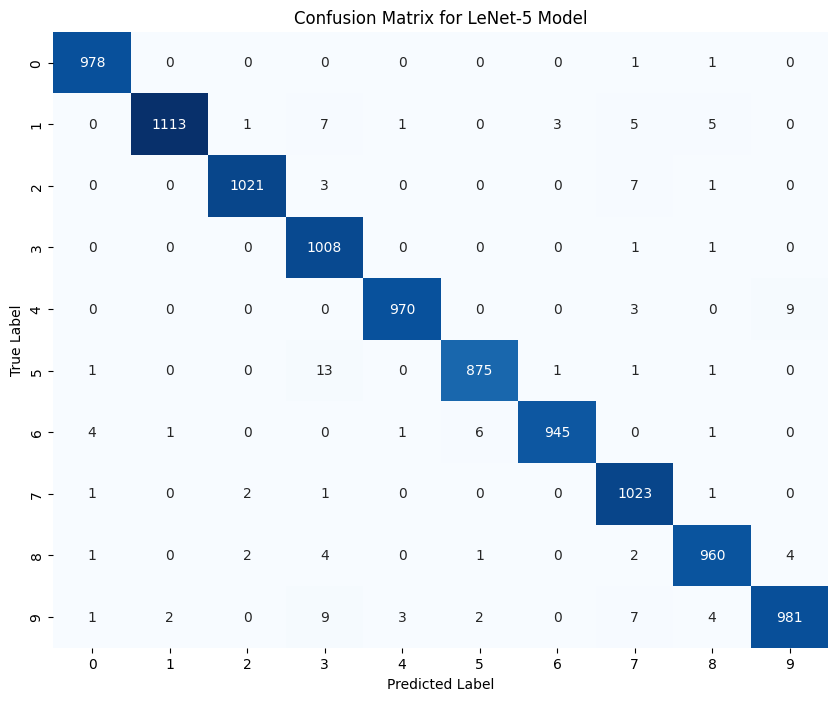

In [ ]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for LeNet-5 Model')
plt.show()

In [ ]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test_labels, y_test_pred, average='weighted')
recall = recall_score(y_test_labels, y_test_pred, average='weighted')
f1 = f1_score(y_test_labels, y_test_pred, average='weighted')
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.9875
Recall: 0.9874
F1 Score: 0.9874


In [ ]:
# Generate a classification report
class_report = classification_report(y_test_labels, y_test_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.98      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.96      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.99      0.99       958
           7       0.97      1.00      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
from tensorflow.keras.models import load_model
# Load the model
model = load_model('/content/drive/MyDrive/dlytica/model/LeNet.h5')

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
sample = x_test[0:1]
predict = model.predict(sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [ ]:
# Get the predicted class
predicted_class = np.argmax(predict, axis=1)[0]


In [ ]:
predicted_class

7

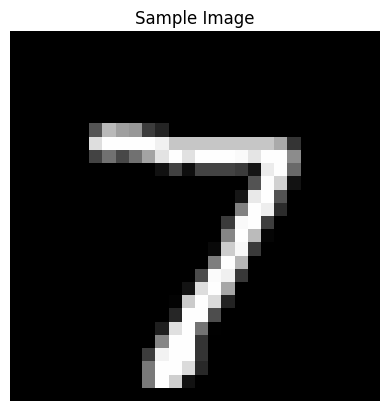

In [ ]:
# Remove the batch dimension for visualization
sample_image = sample.squeeze()  # shape (height, width, channels)

# Plot the image
plt.imshow(sample_image, cmap='gray')  # Use 'gray' for grayscale images; omit cmap for RGB
plt.title('Sample Image')
plt.axis('off')  # Hide the axis
plt.show()